#Create the environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/ESoWC

/content/drive/My Drive/ESoWC


In [ ]:
import pandas as pd
import xarray as xr
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":20,"axes.titlesize":20,"axes.labelsize":20})  

#Import the dataset

In [ ]:
dataset = xr.open_dataset('Data/05_2019_weather_and_CO.nc')
dataset

<xarray.Dataset>
Dimensions:         (latitude: 33, longitude: 33, time: 742)
Coordinates:
  * time            (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
  * latitude        (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * longitude       (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
Data variables: (12/15)
    EMISSIONS_2019  (time, latitude, longitude) float64 ...
    u10             (time, latitude, longitude) float64 ...
    v10             (time, latitude, longitude) float64 ...
    hcc             (time, latitude, longitude) float64 ...
    lcc             (time, latitude, longitude) float64 ...
    tcc             (time, latitude, longitude) float64 ...
    ...              ...
    tmp             (time, latitude, longitude) float64 ...
    sp_hum          (time, latitude, longitude) float64 ...
    rel_hum         (time, latitude, longitude) float64 ...
    tcwv            (time, latitude, longitude) float64 ...
    tcw             (time, latitude, longitude) float64 ...
    tot_wind        (time, latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-08-11 22:54:00

We convert the dataset in dataframe and we delete all the rows where there is a NA

In [ ]:
df = dataset.to_dataframe()
df = df.dropna()
df.head()

EMISSIONS_2019  ...  tot_wind
latitude longitude time                                 ...          
43.0     4.0       2019-05-01 01:00:00    1.605808e-13  ...  5.841263
                   2019-05-01 02:00:00    1.405082e-13  ...  5.454147
                   2019-05-01 03:00:00    1.354900e-13  ...  5.150618
                   2019-05-01 04:00:00    1.354900e-13  ...  4.817765
                   2019-05-01 05:00:00    1.455263e-13  ...  4.485566

[5 rows x 15 columns]

In [ ]:
df.shape

(784080, 15)

We standardize the data 

In [ ]:
scaler = MinMaxScaler()

df_norm =  pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_norm.head()

,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind
0,0.000015,0.515923,0.430374,2.980215e-08,0.045595,0.046689,0.0,0.0,0.923303,0.188289,0.000000,0.63961,0.360875,0.353796,0.301288
1,0.000013,0.530493,0.456249,2.980215e-08,0.048083,0.050270,0.0,0.0,0.921905,0.162800,0.009950,0.67372,0.348015,0.341166,0.281312
2,0.000013,0.545064,0.482124,2.980215e-08,0.050570,0.053851,0.0,0.0,0.920507,0.137311,0.019900,0.70783,0.335154,0.328536,0.265650
3,0.000013,0.533036,0.489692,2.980215e-08,0.035199,0.038484,0.0,0.0,0.921300,0.093932,0.019292,0.79351,0.330104,0.323577,0.248474
4,0.000014,0.521008,0.497261,2.980215e-08,0.019827,0.023118,0.0,0.0,0.922093,0.050553,0.018684,0.87919,0.325053,0.318619,0.231332


#Exploratory analisys

In [ ]:
df.describe()

,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind
count,7.840800e+05,784080.000000,784080.000000,7.840800e+05,7.840800e+05,7.840800e+05,784080.000000,7.840800e+05,784080.000000,784080.000000,7.840800e+05,784080.000000,784080.000000,784080.000000,784080.000000
mean,1.393342e-10,0.541494,-0.812647,4.430894e-01,3.059345e-01,6.726984e-01,0.347056,5.550662e-01,95074.450529,268.626954,3.982332e-06,0.000156,15.039912,15.245337,2.599778
std,2.436831e-10,1.939251,2.283584,3.921466e-01,2.992436e-01,3.289522e-01,0.224963,2.555267e-01,4905.557103,2.865831,2.948695e-08,0.000039,5.216261,5.320466,1.780508
min,4.926107e-15,-8.676917,-16.424454,-2.980232e-08,-7.450581e-08,-1.490116e-08,0.000000,2.980232e-08,78395.812744,260.379089,3.887154e-06,0.000074,2.562780,2.564505,0.002536
25%,2.539394e-11,-0.521978,-2.093248,2.823869e-02,4.300138e-02,4.160264e-01,0.169003,3.872967e-01,93290.961833,266.576500,3.960107e-06,0.000128,10.977624,11.101702,1.363653
50%,7.167822e-11,0.514747,-0.762529,3.694109e-01,2.037302e-01,7.863322e-01,0.320430,5.911442e-01,96741.479168,268.783133,3.985915e-06,0.000149,14.803978,15.007303,2.119722
75%,1.747307e-10,1.498961,0.622519,8.731175e-01,5.158591e-01,9.760501e-01,0.487199,7.552364e-01,98317.695311,270.660903,4.004114e-06,0.000179,18.749157,19.014816,3.447694
max,1.039173e-08,13.880106,10.038965,1.000006e+00,1.000004e+00,1.000008e+00,0.924688,9.809856e-01,103479.062500,277.981822,4.055465e-06,0.000313,36.134569,36.814957,19.381739


In [ ]:
df_norm.describe()

,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind
count,784080.000000,784080.000000,784080.000000,784080.000000,784080.000000,784080.000000,784080.000000,784080.000000,784080.000000,784080.000000,784080.000000,784080.000000,784080.000000,784080.000000,784080.000000
mean,0.013408,0.408671,0.589939,0.443087,0.305933,0.672693,0.375323,0.565825,0.664931,0.468556,0.565490,0.343890,0.371655,0.370238,0.134022
std,0.023450,0.085971,0.086292,0.392144,0.299242,0.328950,0.243285,0.260480,0.195571,0.162806,0.175194,0.162594,0.155376,0.155340,0.091877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002443,0.361525,0.541548,0.028239,0.043001,0.416023,0.182768,0.394804,0.593829,0.352071,0.433443,0.225395,0.250652,0.249258,0.070236
50%,0.006897,0.407486,0.591833,0.369409,0.203729,0.786326,0.346528,0.602602,0.731391,0.477428,0.586780,0.311867,0.364628,0.363289,0.109250
75%,0.016814,0.451118,0.644171,0.873113,0.515857,0.976043,0.526880,0.769875,0.794231,0.584103,0.694904,0.439970,0.482142,0.480295,0.177776
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


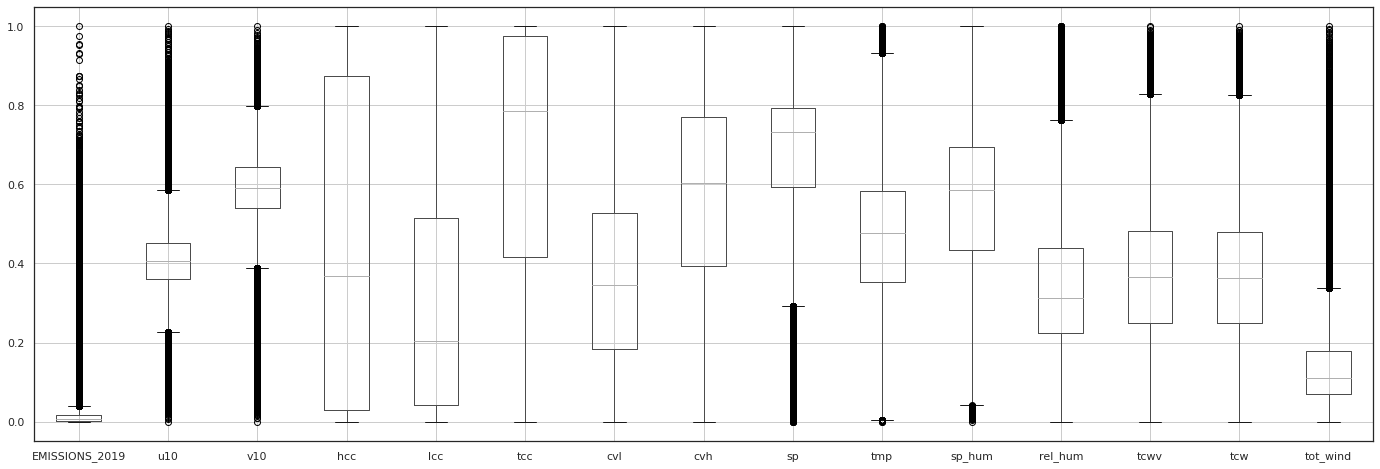

In [ ]:
df_norm.boxplot(figsize=(24,8));

(15.5, -0.5)

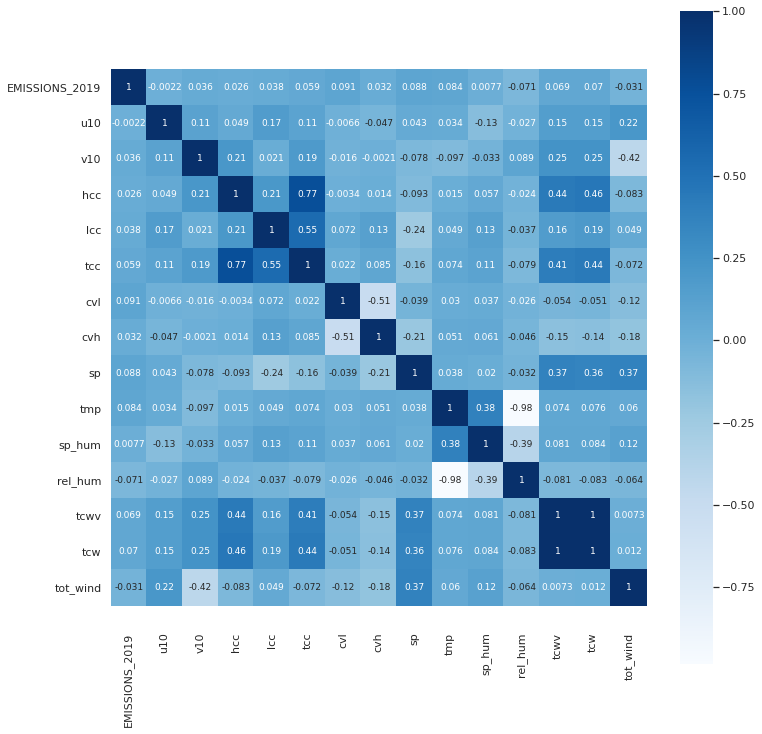

In [ ]:
plt.figure(figsize=(12, 12));
cov=df_norm.corr(method='pearson')
sns.heatmap(cov,square=True,annot=True,cmap="Blues",annot_kws={"size": 9});
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

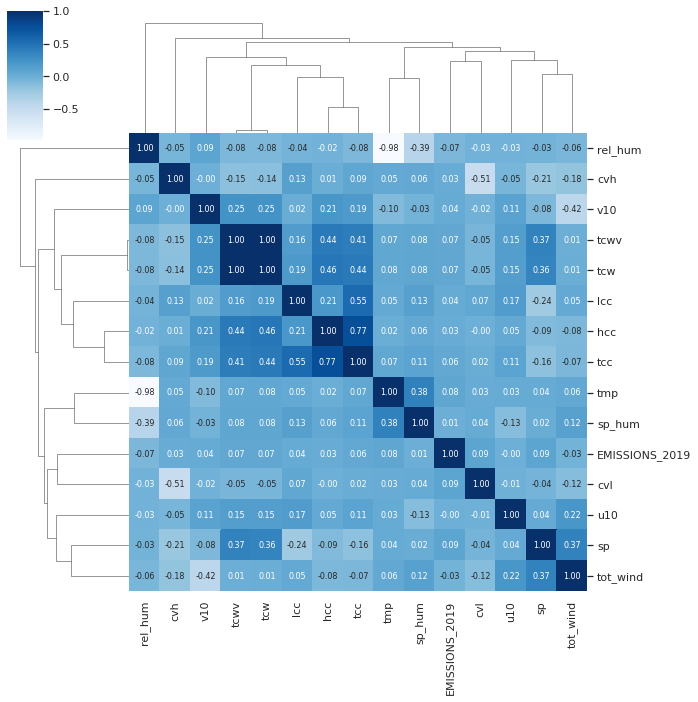

In [ ]:
plt.figure(figsize=(15, 15));
sns.clustermap(cov,square=True,annot=True,cmap="Blues",annot_kws={"size": 8},fmt='.2f');  

#Time series with fixed lat-lon


In this paragraph we set a latitude and a longitude value to be able to analyze the data as if they were time series

In [ ]:
df_fix = df.reset_index()
df_fix = df_fix[df_fix['latitude']==44.0]
df_fix = df_fix[df_fix['longitude']==4.0]
df_fix.head()

,latitude,longitude,time,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind
95040,44.0,4.0,2019-05-01 01:00:00,3.137387e-11,0.843820,-3.343032,0.0,0.084150,0.084148,0.194947,0.802257,96324.765625,264.088528,0.000004,0.000219,11.019144,11.024956,3.447883
95041,44.0,4.0,2019-05-01 02:00:00,2.745214e-11,1.106738,-2.833548,0.0,0.074748,0.074745,0.194947,0.802257,96286.125000,263.643019,0.000004,0.000227,10.724398,10.731584,3.042016
95042,44.0,4.0,2019-05-01 03:00:00,2.647171e-11,1.369656,-2.324064,0.0,0.065346,0.065342,0.194947,0.802257,96247.484375,263.197510,0.000004,0.000234,10.429652,10.438212,2.697634
95043,44.0,4.0,2019-05-01 04:00:00,2.647171e-11,1.357717,-2.385400,0.0,0.054344,0.054341,0.194947,0.802257,96267.720500,262.353058,0.000004,0.000256,10.334534,10.342357,2.744727
95044,44.0,4.0,2019-05-01 05:00:00,2.843257e-11,1.345779,-2.446735,0.0,0.043342,0.043341,0.194947,0.802257,96287.956624,261.508606,0.000004,0.000277,10.239416,10.246502,2.792424


From here we select only the features which change in time.
The two features 'cvl' and 'cvh' (which are the values related to the vegetation) are basically constant so are not considered in this analysis

In [ ]:
df_fix_notall = df_fix[['time','EMISSIONS_2019','u10','v10','tot_wind','hcc','lcc','tcc','sp','tmp','sp_hum','rel_hum','tcwv','tcw']]
df_fix_notall=df_fix_notall.set_index('time')
df_fix_notall.head()

,EMISSIONS_2019,u10,v10,tot_wind,hcc,lcc,tcc,sp,tmp,sp_hum,rel_hum,tcwv,tcw
time,,,,,,,,,,,,,
2019-05-01 01:00:00,3.137387e-11,0.843820,-3.343032,3.447883,0.0,0.084150,0.084148,96324.765625,264.088528,0.000004,0.000219,11.019144,11.024956
2019-05-01 02:00:00,2.745214e-11,1.106738,-2.833548,3.042016,0.0,0.074748,0.074745,96286.125000,263.643019,0.000004,0.000227,10.724398,10.731584
2019-05-01 03:00:00,2.647171e-11,1.369656,-2.324064,2.697634,0.0,0.065346,0.065342,96247.484375,263.197510,0.000004,0.000234,10.429652,10.438212
2019-05-01 04:00:00,2.647171e-11,1.357717,-2.385400,2.744727,0.0,0.054344,0.054341,96267.720500,262.353058,0.000004,0.000256,10.334534,10.342357
2019-05-01 05:00:00,2.843257e-11,1.345779,-2.446735,2.792424,0.0,0.043342,0.043341,96287.956624,261.508606,0.000004,0.000277,10.239416,10.246502


In [ ]:
scaler = MinMaxScaler()

df_fix_norm =  pd.DataFrame(scaler.fit_transform(df_fix_notall), columns=df_fix_notall.columns)
df_fix_norm.index=df_fix_notall.index
df_fix_norm['time'] = df_fix_norm.index
df_fix_norm.head()

,EMISSIONS_2019,u10,v10,tot_wind,hcc,lcc,tcc,sp,tmp,sp_hum,rel_hum,tcwv,tcw,time
time,,,,,,,,,,,,,,
2019-05-01 01:00:00,0.040975,0.362301,0.476763,0.273680,5.551083e-17,0.085844,0.084148,0.478572,0.260862,0.000000,0.581283,0.284275,0.266943,2019-05-01 01:00:00
2019-05-01 02:00:00,0.018486,0.385597,0.505459,0.239287,5.551083e-17,0.076253,0.074744,0.457709,0.227359,0.014503,0.618295,0.270909,0.254462,2019-05-01 02:00:00
2019-05-01 03:00:00,0.012864,0.408893,0.534154,0.210104,5.551083e-17,0.066663,0.065341,0.436846,0.193856,0.029006,0.655306,0.257544,0.241982,2019-05-01 03:00:00
2019-05-01 04:00:00,0.012864,0.407835,0.530700,0.214094,5.551083e-17,0.055439,0.054341,0.447772,0.130352,0.021860,0.759735,0.253230,0.237904,2019-05-01 04:00:00
2019-05-01 05:00:00,0.024109,0.406777,0.527245,0.218136,5.551083e-17,0.044215,0.043340,0.458698,0.066848,0.014713,0.864165,0.248917,0.233826,2019-05-01 05:00:00


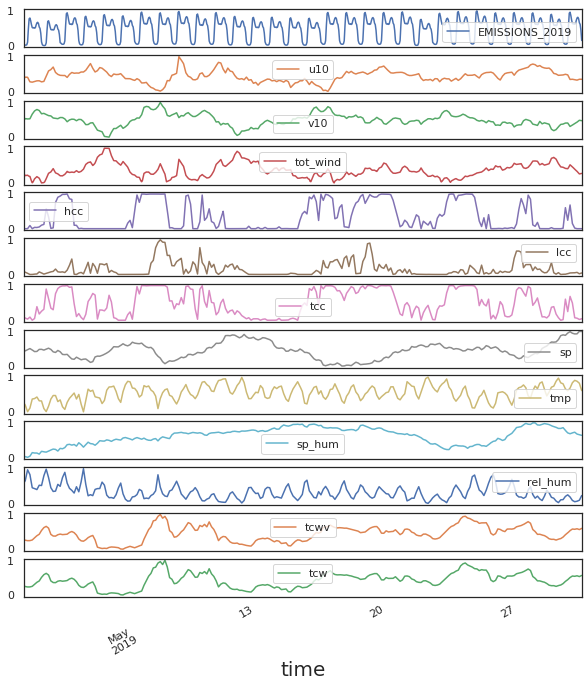

In [ ]:
df_fix_norm.plot(subplots=True, figsize=(10,12), x='time');

From here we split the dataframe in two parts to make a better analysis

In [ ]:
df_fix_norm_1 = df_fix_norm[['time','EMISSIONS_2019','u10','v10','tot_wind','hcc','lcc','tcc']]
df_fix_norm_2 = df_fix_norm[['time','EMISSIONS_2019','sp','tmp','sp_hum','rel_hum','tcwv','tcw']]

In [ ]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)    

First dataframe is df_fix_norm_1

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureW

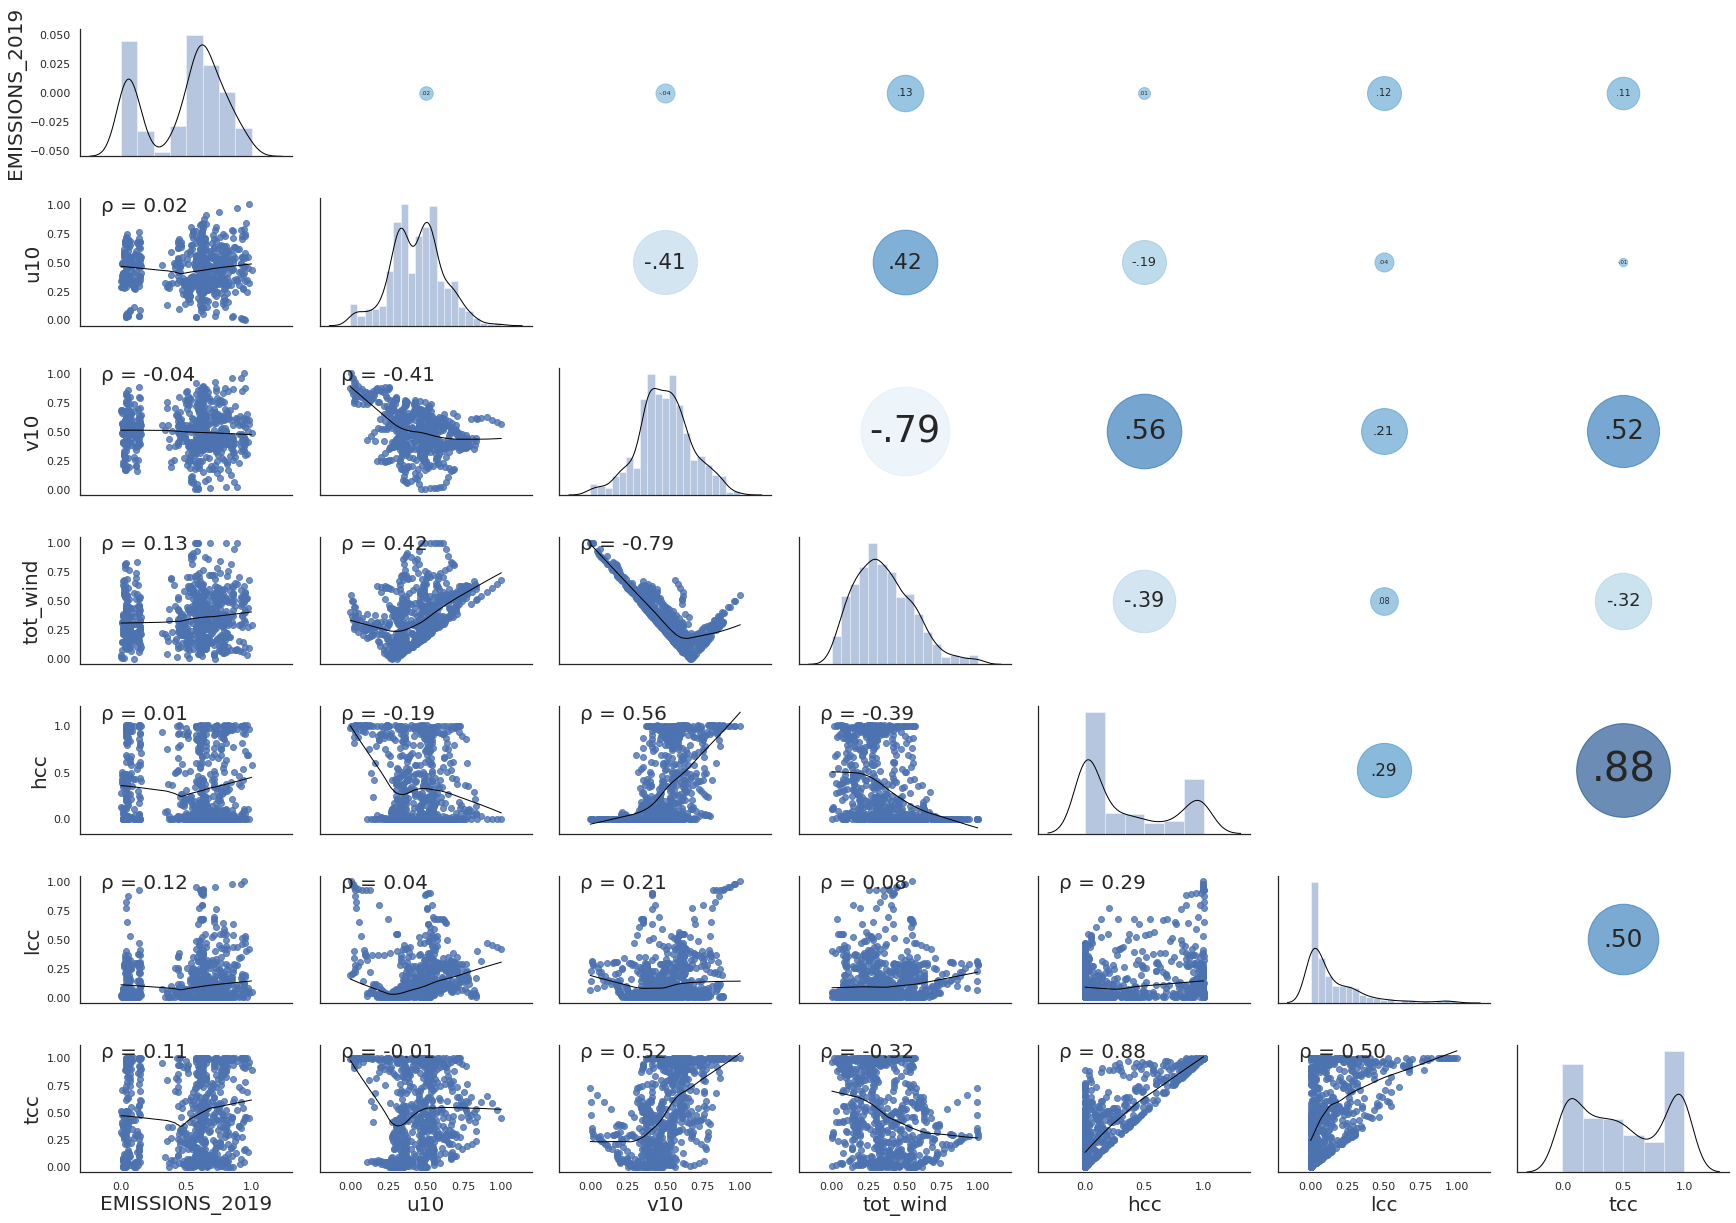

In [ ]:
g = sns.PairGrid(df_fix_norm_1, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

In [ ]:
df_fix_change_1=df_fix_norm_1.set_index('time')
df_fix_change_1 = df_fix_change_1.pct_change()
df_fix_change_1=df_fix_change_1.replace(np.nan, 0)
df_fix_change_1=df_fix_change_1.replace(np.inf, 1)
df_fix_change_1.head()

,EMISSIONS_2019,u10,v10,tot_wind,hcc,lcc,tcc
time,,,,,,,
2019-05-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2019-05-01 02:00:00,-0.548834,0.064301,0.060188,-0.125669,0.0,-0.111725,-0.111747
2019-05-01 03:00:00,-0.304120,0.060416,0.056771,-0.121958,0.0,-0.125777,-0.125805
2019-05-01 04:00:00,0.000000,-0.002587,-0.006467,0.018994,0.0,-0.168366,-0.168353
2019-05-01 05:00:00,0.874057,-0.002594,-0.006509,0.018879,0.0,-0.202452,-0.202434


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

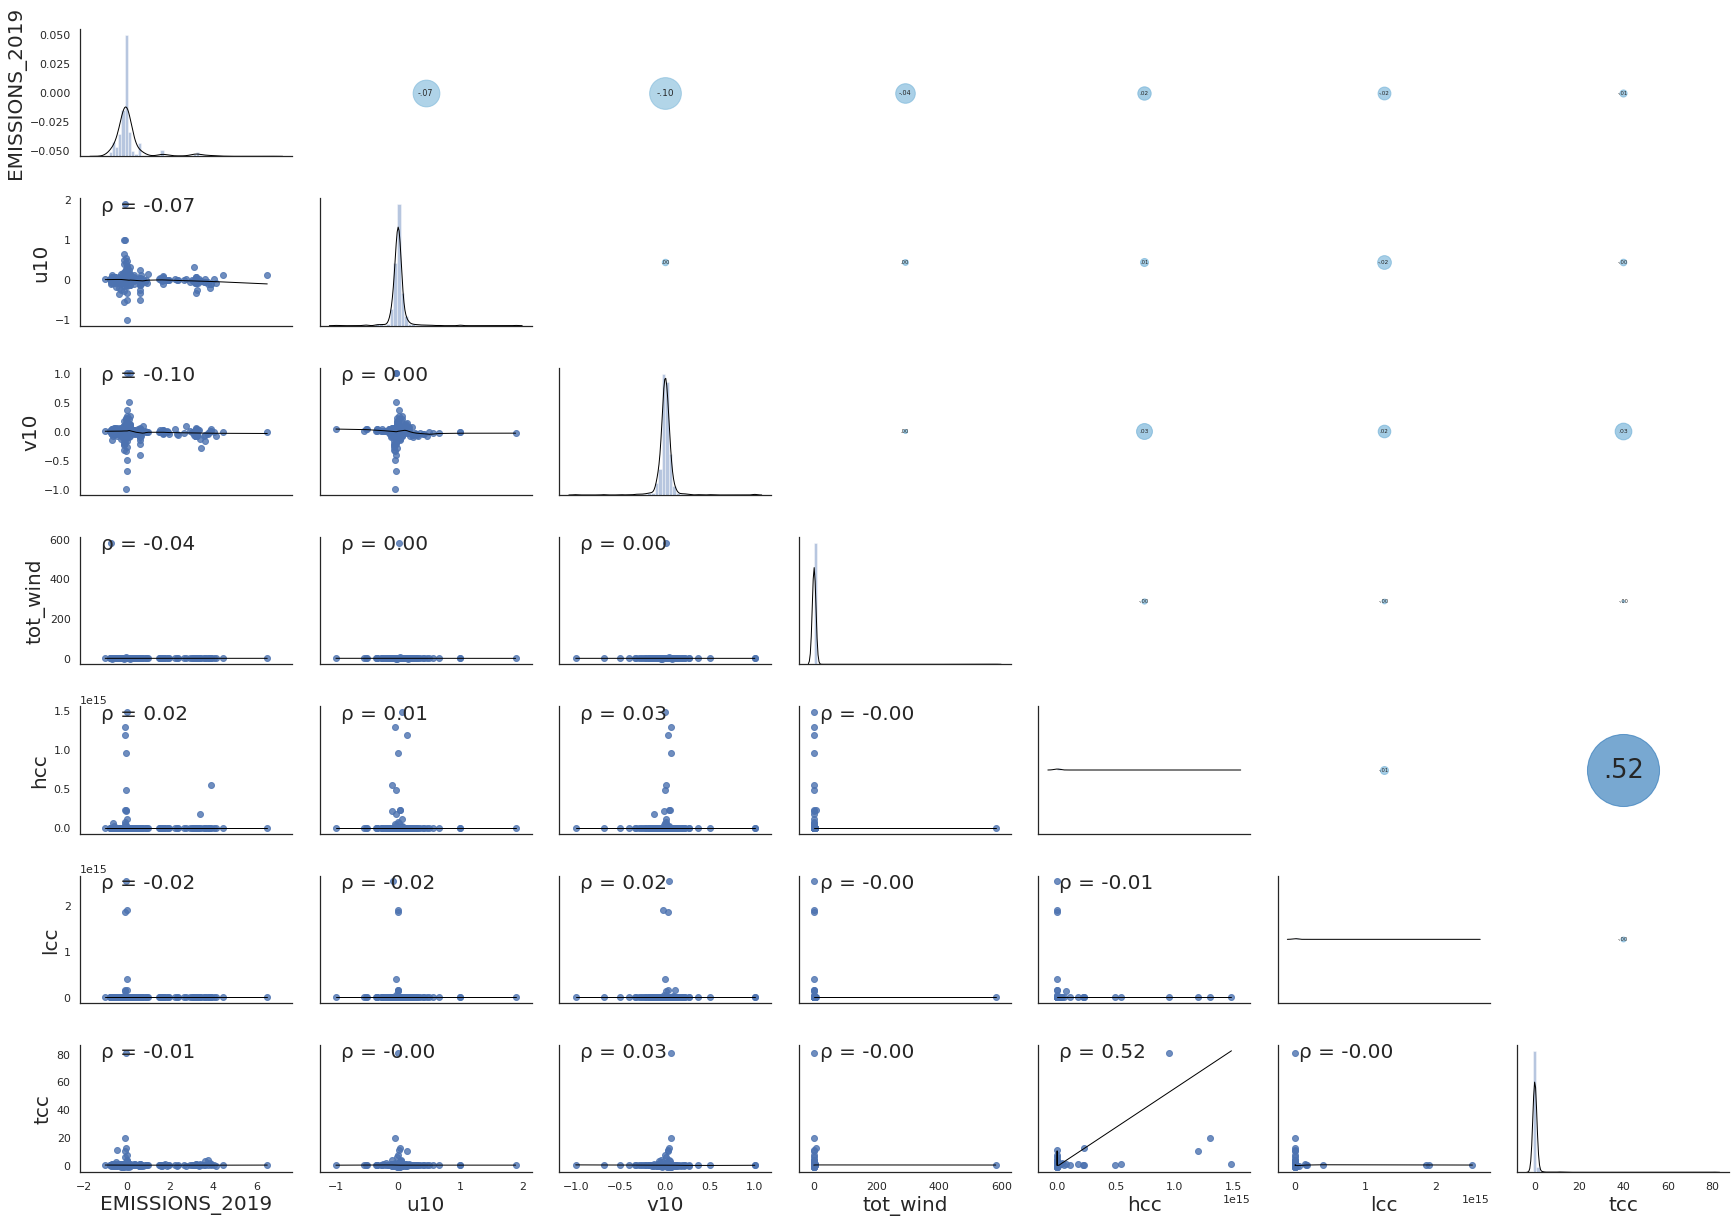

In [ ]:
g = sns.PairGrid(df_fix_change_1, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

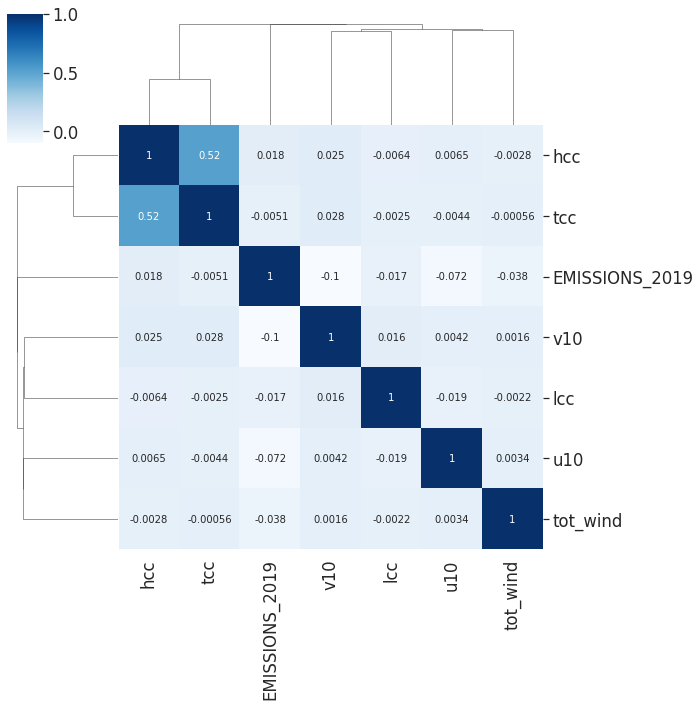

In [ ]:
correlations=df_fix_change_1.corr()
sns.set(font_scale=1.5)
sns.clustermap(correlations, cmap="Blues", annot=True, annot_kws={"size": 10});

Second dataframe is df_fix_norm_2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

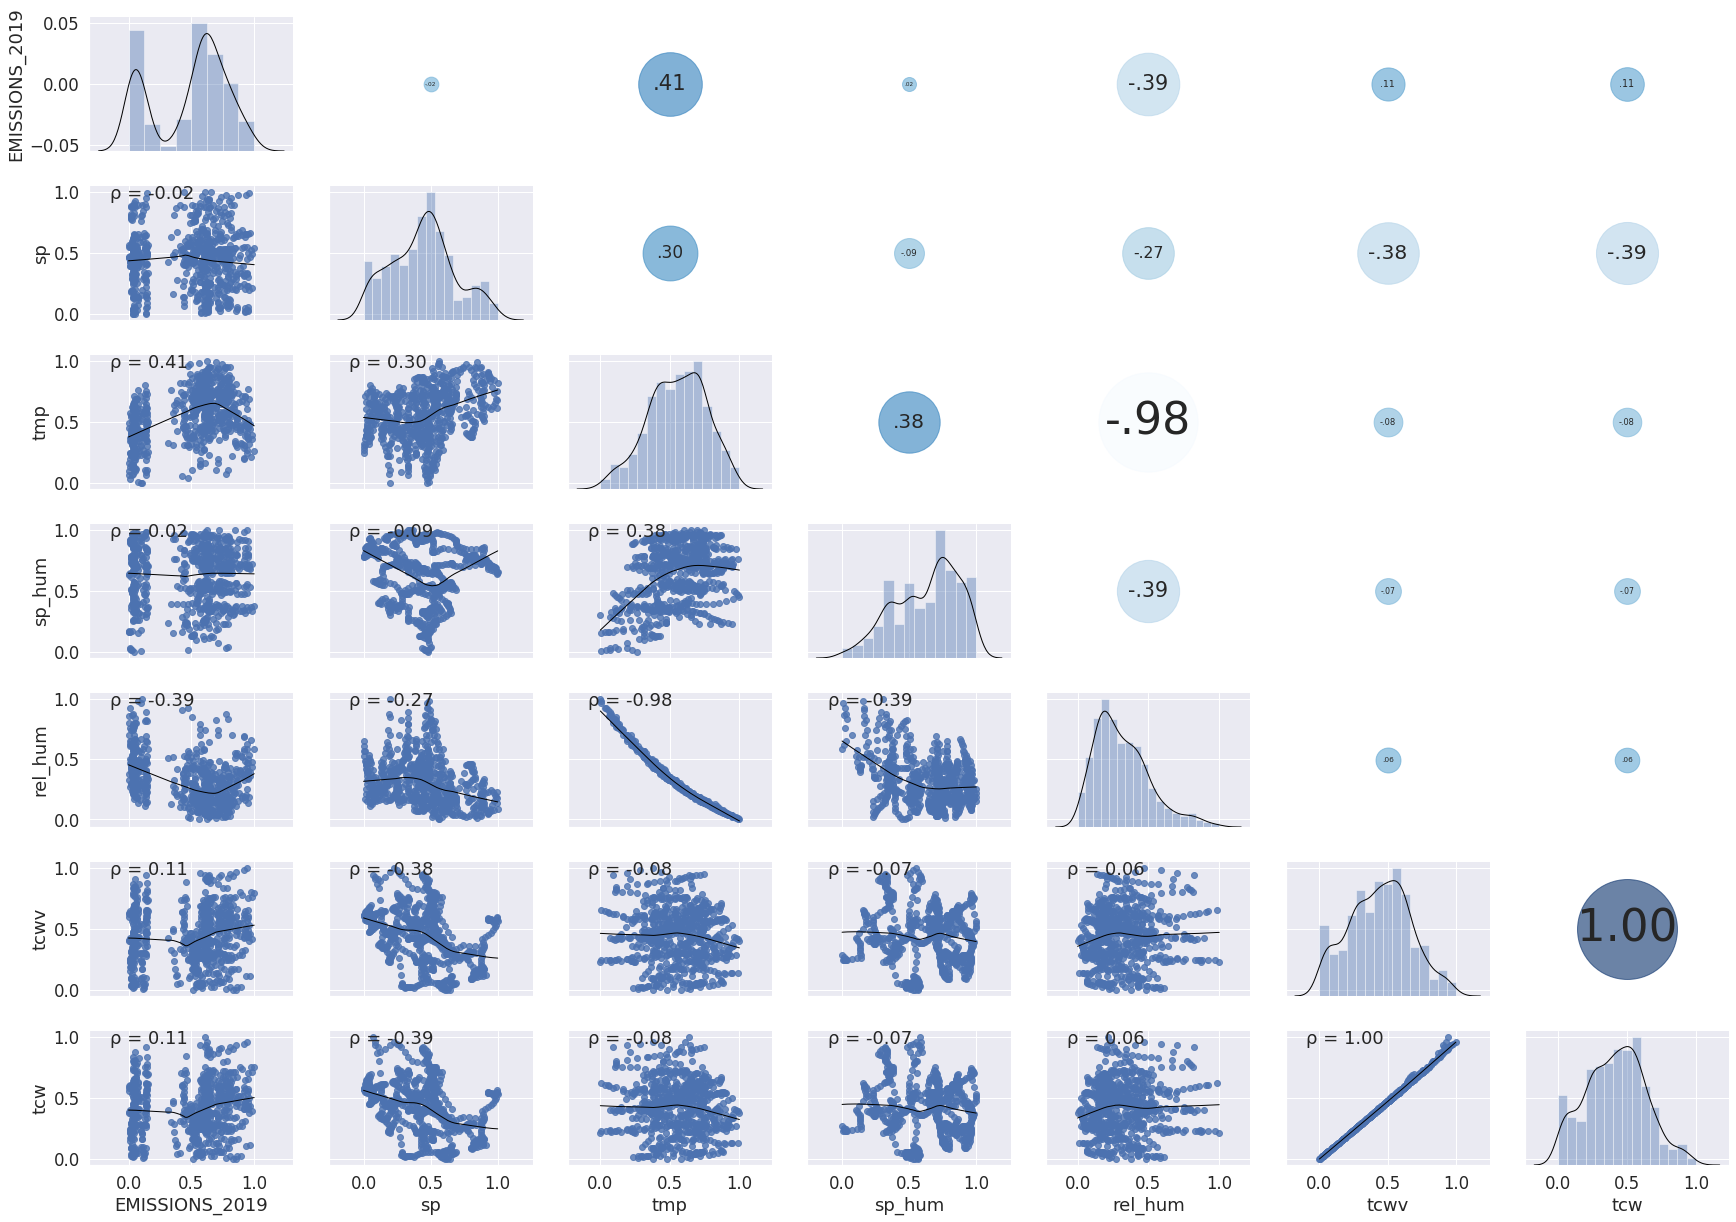

In [ ]:
g = sns.PairGrid(df_fix_norm_2, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

In [ ]:
df_fix_change_2=df_fix_norm_2.set_index('time')
df_fix_change_2 = df_fix_change_2.pct_change()
df_fix_change_2=df_fix_change_2.replace(np.nan, 0)
df_fix_change_2=df_fix_change_2.replace(np.inf, 1)
df_fix_change_2.head()

,EMISSIONS_2019,sp,tmp,sp_hum,rel_hum,tcwv,tcw
time,,,,,,,
2019-05-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-05-01 02:00:00,-0.548834,-0.043594,-0.128432,1.000000,0.063672,-0.047017,-0.046754
2019-05-01 03:00:00,-0.304120,-0.045581,-0.147357,1.000000,0.059861,-0.049337,-0.049047
2019-05-01 04:00:00,0.000000,0.025011,-0.327584,-0.246379,0.159359,-0.016748,-0.016852
2019-05-01 05:00:00,0.874057,0.024401,-0.487174,-0.326928,0.137455,-0.017033,-0.017141


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

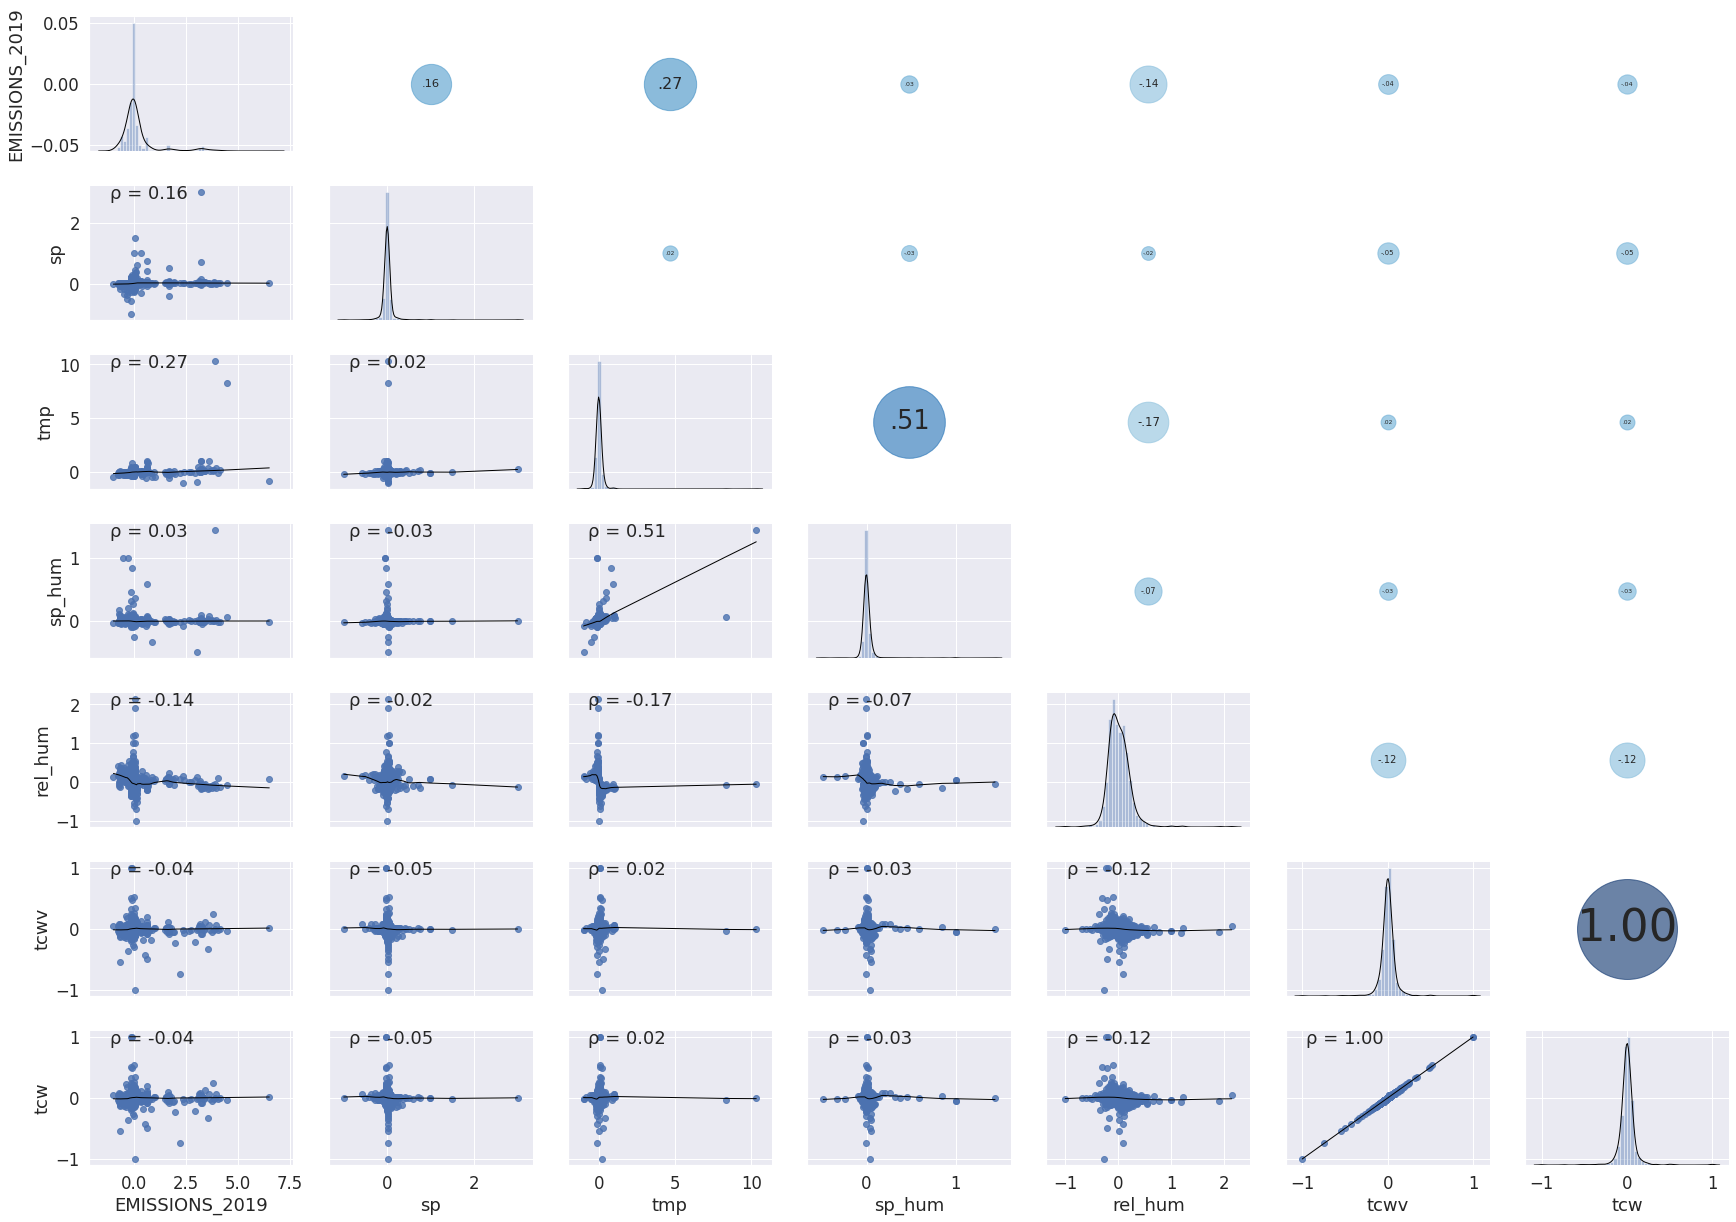

In [ ]:
g = sns.PairGrid(df_fix_change_2, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

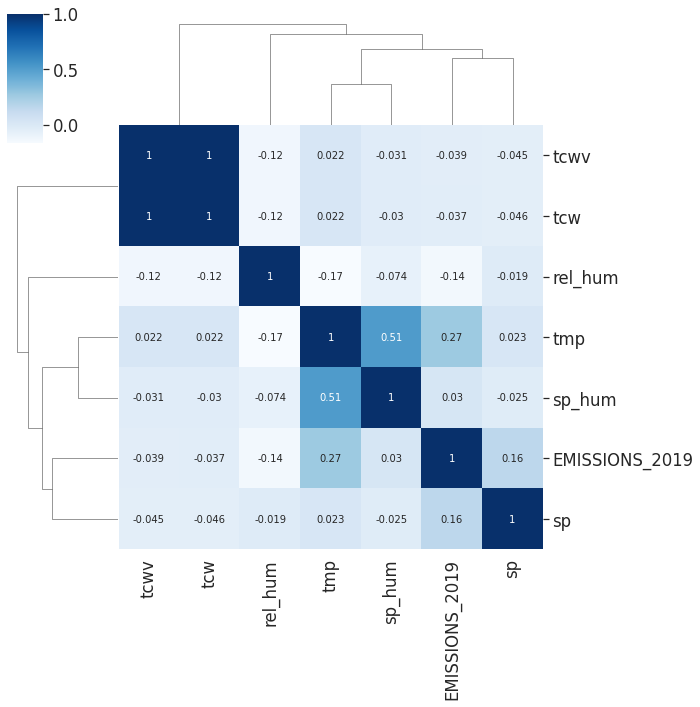

In [ ]:
correlations=df_fix_change_2.corr()
sns.set(font_scale=1.5)
sns.clustermap(correlations, cmap="Blues", annot=True, annot_kws={"size": 10});

Conclusion: 
*   tmp and rel_hum are too much correlated. We can consider deleting one of the two in our model
*   tcw and tcwv are too much correlated. We can consider deleting one of the two in our model





#Shift

In this part of the notebook we are trying to understand if by shifting the data we can get a better correlation

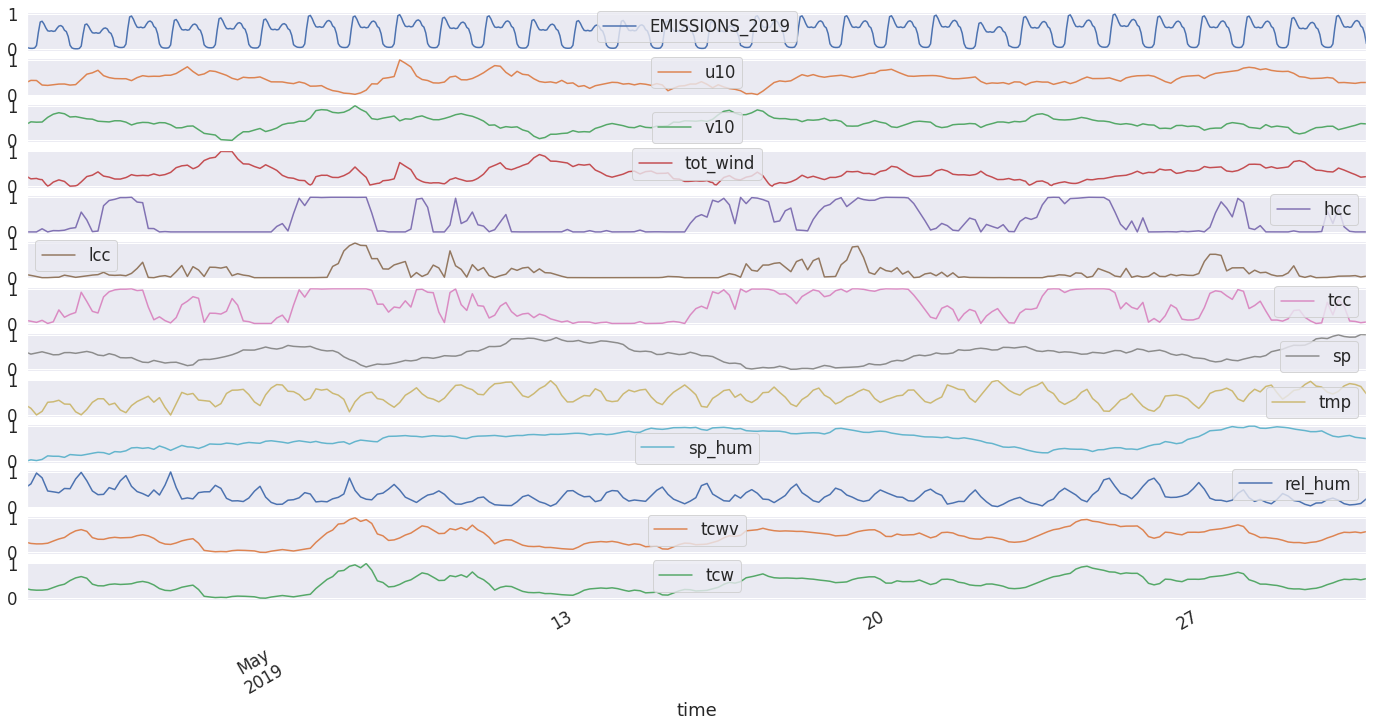

In [ ]:
df_fix_norm.plot(subplots=True, figsize=(24,12), x='time');

Here we add the shifted emissions at the dataframe

In [ ]:
df_shift=df_fix_norm

for x in range(-12, 12):
  columnName = 'EMISSIONS_shif_'+str(x)
  df_shift[columnName]=df_shift.EMISSIONS_2019.shift(periods=x)
  df_shift=df_shift.dropna(subset = [columnName])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(37.5, -0.5)

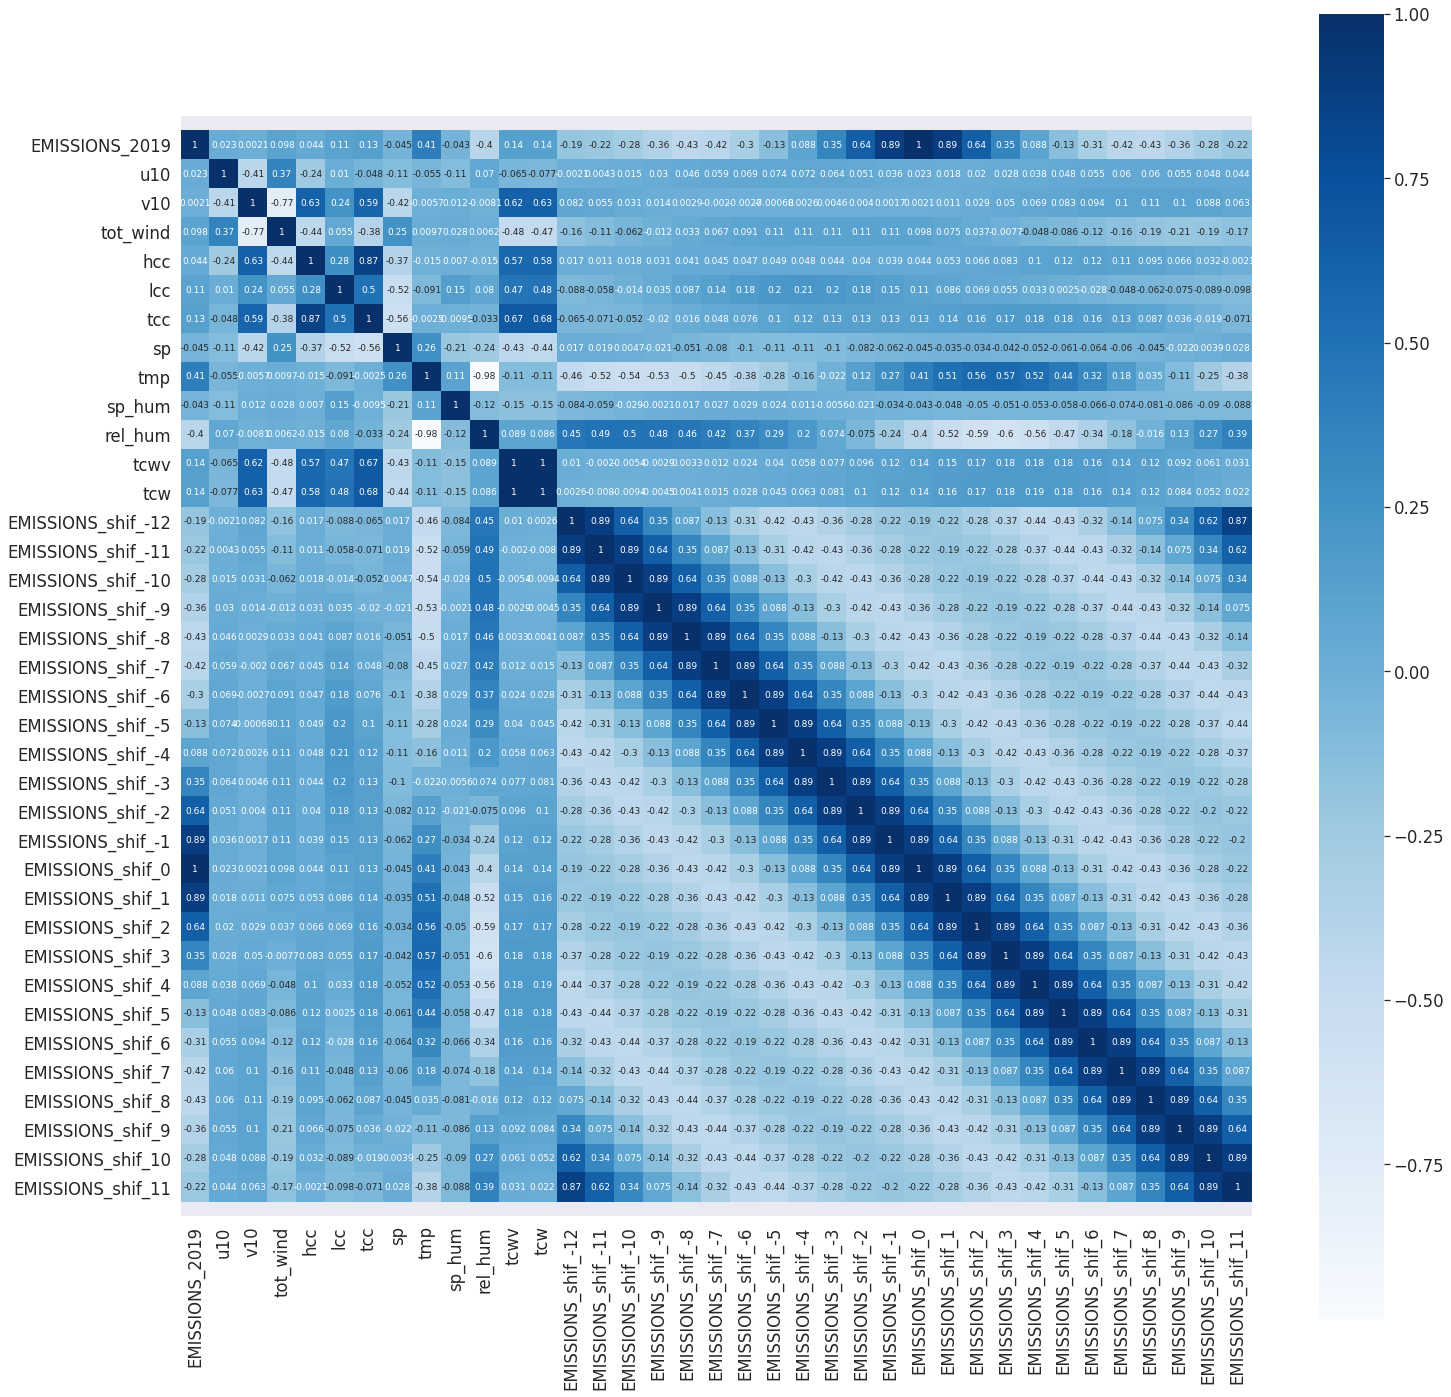

In [ ]:
plt.figure(figsize=(24, 24));
cov=df_shift.corr(method='pearson')
sns.heatmap(cov,square=True,annot=True,cmap="Blues",annot_kws={"size": 9});
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In the next cells we will create a for loop to better understand which shift is better for which feature. We decide to use only the shift from -12 to 0 since it make more sense to use the values of the features to predict emissions in the future rather than the other way around.

For each feature we will calculate the correlation with all the shifted emissions. We will calculate the correlation  for all the latitudes-longitudes and we will take the mean

In [ ]:
df_ = df.reset_index()
df_ = df_.set_index('time')
df_.head()

,latitude,longitude,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind
time,,,,,,,,,,,,,,,,,
2019-05-01 01:00:00,43.0,4.0,1.605808e-13,2.960762,-5.035299,0.0,0.045595,0.046689,0.0,2.980232e-08,101555.247396,263.693481,0.000004,0.000227,14.677999,14.682165,5.841263
2019-05-01 02:00:00,43.0,4.0,1.405082e-13,3.289431,-4.350558,0.0,0.048083,0.050270,0.0,2.980232e-08,101520.182292,263.244812,0.000004,0.000235,14.246251,14.249586,5.454147
2019-05-01 03:00:00,43.0,4.0,1.354900e-13,3.618101,-3.665817,0.0,0.050570,0.053851,0.0,2.980232e-08,101485.117188,262.796143,0.000004,0.000243,13.814503,13.817007,5.150618
2019-05-01 04:00:00,43.0,4.0,1.354900e-13,3.346790,-3.465523,0.0,0.035199,0.038485,0.0,2.980232e-08,101505.005208,262.032552,0.000004,0.000264,13.644949,13.647179,4.817765
2019-05-01 05:00:00,43.0,4.0,1.455263e-13,3.075480,-3.265230,0.0,0.019827,0.023118,0.0,2.980232e-08,101524.893229,261.268962,0.000004,0.000284,13.475395,13.477350,4.485566


In [ ]:
features=['u10','v10','hcc','lcc','tcc','cvl','cvh','sp','tmp','sp_hum','rel_hum','tcwv','tcw','tot_wind']

columns=['feature','emission','score']
df_results = pd.DataFrame(columns = columns)

for feature_name in features:
  for x in range(-12, 0):
    emission_name = 'EMISSIONS_shif_'+str(x)
    df_[emission_name]=df_.EMISSIONS_2019.shift(periods=x)

    result=0
    i = 0
    for lat in df_.latitude.unique():
      for lon in df_.longitude.unique():
          i=i+1

          df_fixed = df_[df_['latitude']==lat]
          df_fixed = df_fixed[df_fixed['longitude']==lon]

          score=df_fixed[feature_name].corr(df_fixed[emission_name])

          result = result + score

    new_row = {'feature':feature_name, 'emission':emission_name, 'score':result/i}
    df_results = df_results.append(new_row, ignore_index=True)

  print('feature '+feature_name+' elaborated')

df_results.head()

feature u10 elaborated
feature v10 elaborated
feature hcc elaborated
feature lcc elaborated
feature tcc elaborated
feature cvl elaborated
feature cvh elaborated
feature sp elaborated
feature tmp elaborated
feature sp_hum elaborated
feature rel_hum elaborated
feature tcwv elaborated
feature tcw elaborated
feature tot_wind elaborated


,feature,emission,score
0,u10,EMISSIONS_shif_-12,-0.028073
1,u10,EMISSIONS_shif_-11,-0.027369
2,u10,EMISSIONS_shif_-10,-0.021165
3,u10,EMISSIONS_shif_-9,-0.009777
4,u10,EMISSIONS_shif_-8,0.005792


We decide to put a threshold of 0.25 for the correlation. Using this threshold we get 3 features 

In [ ]:
df_results[(df_results['score']>0.25) | (df_results['score']<-0.25)].feature.unique()

array(['tmp', 'rel_hum', 'tot_wind'], dtype=object)

In [ ]:
df_results[(df_results['score']>0.25) | (df_results['score']<-0.25)].sort_values(by=['score'])

,feature,emission,score
100,tmp,EMISSIONS_shif_-8,-0.416979
99,tmp,EMISSIONS_shif_-9,-0.412291
101,tmp,EMISSIONS_shif_-7,-0.396641
98,tmp,EMISSIONS_shif_-10,-0.387165
102,tmp,EMISSIONS_shif_-6,-0.349401
97,tmp,EMISSIONS_shif_-11,-0.344154
96,tmp,EMISSIONS_shif_-12,-0.280798
103,tmp,EMISSIONS_shif_-5,-0.275614
156,tot_wind,EMISSIONS_shif_-12,-0.252353
127,rel_hum,EMISSIONS_shif_-5,0.276585


For tmp we get the best correlation with a -8 shift (negative correlation)

For tot_wind we get the best correlation with a -12 shift (negative correlation)

For rel_hum we get the best correlation with a -8 shift (positive correlation)

These 3 new shifted features will be created in the dataset for the model
